In [1]:
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from regrid import regrid
import cartopy
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/phd/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [2]:
foam_lats = np.load('/Users/carmennab/Dropbox/met_office/data/auxiliary/lat_cent.npy')
foam_lons = np.load('/Users/carmennab/Dropbox/met_office/data/auxiliary/lon_cent.npy')
mask_values = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/NSIDC_Regions_Mask.npy')
regions = ['Baffin','Greenland','Barents','Kara','Laptev','East Siberian','Chukchi','Beaufort','Central Arctic']

old_lon = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/new_lon_25km.npy')
old_lat = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/new_lat_25km.npy')

mask = regrid(mask_values,old_lon,old_lat,foam_lons,foam_lats)

In [3]:
mask[mask<6]=np.nan
mask[mask>15]=np.nan
mask[mask==14]=np.nan

In [4]:
np.float = float

### plot figure

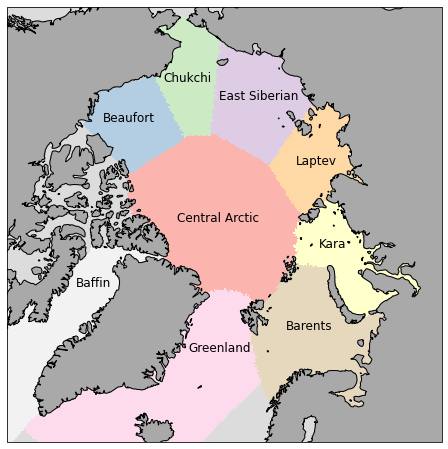

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax.coastlines(zorder=1)
ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
a = ax.pcolormesh(foam_lons,foam_lats,mask[:-1,:-1],cmap='Pastel1_r',zorder=0,transform=ccrs.PlateCarree())

xs = [0.24,0.56,0.75,0.78,0.76,0.67,0.47,0.34,0.58]
ys = [0.35,0.2,0.25,0.44,0.63,0.78,0.82,0.73,0.5]

for count,label in enumerate(regions):
    plt.annotate(label,xy=(xs[count],ys[count]),va='bottom',ha='right',xycoords='axes fraction',color='k',
                 fontsize=12)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/supp_figs/regions.png',bbox_inches = "tight", 
            dpi = 400)